# E91 Implementation

1. create bell pairs
2. choose measurement for alice, bob
    * rotate $|0\rangle$, $|1\rangle$ by $a \in \{0,\frac{\pi}{4},\frac{\pi}{2}\}$ or $b \in \{\frac{\pi}{4},\frac{\pi}{2},\frac{3\pi}{4}\}$

Source: [https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661)

In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
from numpy.random import randint#, choice
import numpy as np
print("Imports Successful")

Imports Successful


In [2]:
msg_len = 10

In [3]:
help(qiskit.circuit.library.U3Gate)

Help on class U3Gate in module qiskit.circuit.library.standard_gates.u3:

class U3Gate(qiskit.circuit.gate.Gate)
 |  U3Gate(theta, phi, lam, label=None)
 |  
 |  Generic single-qubit rotation gate with 3 Euler angles.
 |  
 |  Implemented using two X90 pulses on IBM Quantum systems:
 |  
 |  .. math::
 |      U3(\theta, \phi, \lambda) =
 |          RZ(\phi - \pi/2) RX(\pi/2) RZ(\pi - \theta) RX(\pi/2) RZ(\lambda - \pi/2)
 |  
 |  **Circuit symbol:**
 |  
 |  .. parsed-literal::
 |  
 |           ┌───────────┐
 |      q_0: ┤ U3(ϴ,φ,λ) ├
 |           └───────────┘
 |  
 |  **Matrix Representation:**
 |  
 |  .. math::
 |  
 |      \newcommand{\th}{\frac{\theta}{2}}
 |  
 |      U3(\theta, \phi, \lambda) =
 |          \begin{pmatrix}
 |              \cos(\th)          & -e^{i\lambda}\sin(\th) \\
 |              e^{i\phi}\sin(\th) & e^{i(\phi+\lambda)}\cos(\th)
 |          \end{pmatrix}
 |  
 |  **Examples:**
 |  
 |  .. math::
 |  
 |      U3(\theta, -\frac{\pi}{2}, \frac{pi}{2}) = RX(\th

In [4]:
def alice_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        alice_q = 2*i
        base = randint(3)
        chosen_bases.append(base+1)
        rot = np.pi * base / 4
        qc.h(alice_q)
        qc.u3(-rot/2, 0, 0, alice_q)
        qc.h(alice_q)
        qc.measure(alice_q, alice_q)
    return chosen_bases

def bob_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        bob_q = 2*i + 1
        base = randint(1,4)
        chosen_bases.append(base)
        rot = np.pi * base / 4
        qc.h(bob_q)
        qc.u3(-rot/2, 0, 0, bob_q)
        qc.h(bob_q)
        qc.measure(bob_q, bob_q)
    return chosen_bases

In [5]:
# Prepare Bell States
qc = QuantumCircuit(2*msg_len, 2*msg_len)
for i in range(msg_len):
    q1 = 2*i
    q2 = 2*i + 1
    qc.x(q2)
    qc.h(q1)
    qc.cx(q1,q2)
qc.barrier()
qc.draw()

┌───┐      ░ 
 q_0: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
 q_1: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
 q_2: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
 q_3: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
 q_4: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
 q_5: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
 q_6: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
 q_7: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
 q_8: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
 q_9: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
q_10: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
q_11: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
q_12: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
q_13: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
q_14: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
q_15: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
q_16: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
q_17: ┤ X ├┤ X ├─░─
      ├───┤└───┘ ░ 
q_18: ┤ H ├──■───░─
      ├───┤┌─┴─┐ ░ 
q_19: ┤ X ├┤ X ├─░─
      └───┘└───┘ ░ 
 c_0: ═════════════
                   
 c_1: ═════════════
                   
 c_2: ═════════════
                   
 c_3: ═════════════
                   
 c_4: ═════════════
                   
 c_5: ═════════════
                   
 c_6: ═════════════
                   
 c_7: ═════════════
                   
 c_8: ═════════════
                   
 c_9: ═════════════
                   
c_10: ═════════════
                   
c_11: ═════════════
                   
c_12: ═════════════
                   
c_13: ═════════════
                   
c_14: ═════════════
                   
c_15: ═════════════
                   
c_16: ═════════════
                   
c_17: ═════════════
                   
c_18: ═════════════
                   
c_19: ═════════════

In [6]:
# add measurements with random bases
a_bases = alice_measure(qc)
b_bases = bob_measure(qc)
#qc.draw()

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc, shots=1, memory=True)
result = qasm_sim.run(qobj).result()
# get_counts returns a dict, with the classical register as the *key* 
# which feels silly. this ugly idiom retrieves that key. surely a 
# better way to do this
measurements = [k for k in result.get_counts()][0]

In [8]:
for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
    if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
        a_m = measurements[2*idx]
        b_m = measurements[2*idx + 1]
        print("match! idx {}, Alice measured {} and Bob measured {}".format(idx, a_m, b_m))

In [9]:
measurements

'11101110011110100101'

In [13]:
for i in range(10):
    print("Run {}".format(i))
    # Prepare Bell States
    qc = QuantumCircuit(2*msg_len, 2*msg_len)
    for i in range(msg_len):
        q1 = 2*i
        q2 = 2*i + 1
        qc.x(q2)
        qc.h(q1)
        qc.cx(q1,q2)
    qc.barrier()
    # add measurements with random bases
    a_bases = alice_measure(qc)
    b_bases = bob_measure(qc)
    qobj = assemble(qc, shots=1, memory=True)
    result = qasm_sim.run(qobj).result()
    # get_counts returns a dict, with the classical register as the *key* 
    # which feels silly. this ugly idiom retrieves that key. surely a 
    # better way to do this
    measurements = [k for k in result.get_counts()][0]
    for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
        if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
            a_m = measurements[2*idx]
            b_m = measurements[2*idx + 1]
            if(a_m + b_m == 1):
                print("good match!")
            else:
                print("bad match")

Run 0
bad match
bad match
bad match
Run 1
bad match
bad match
Run 2
bad match
Run 3
bad match
Run 4
bad match
bad match
bad match
bad match
bad match
Run 5
bad match
bad match
bad match
bad match
bad match
Run 6
bad match
Run 7
bad match
bad match
bad match
bad match
bad match
bad match
Run 8
bad match
Run 9
bad match
bad match
bad match
bad match


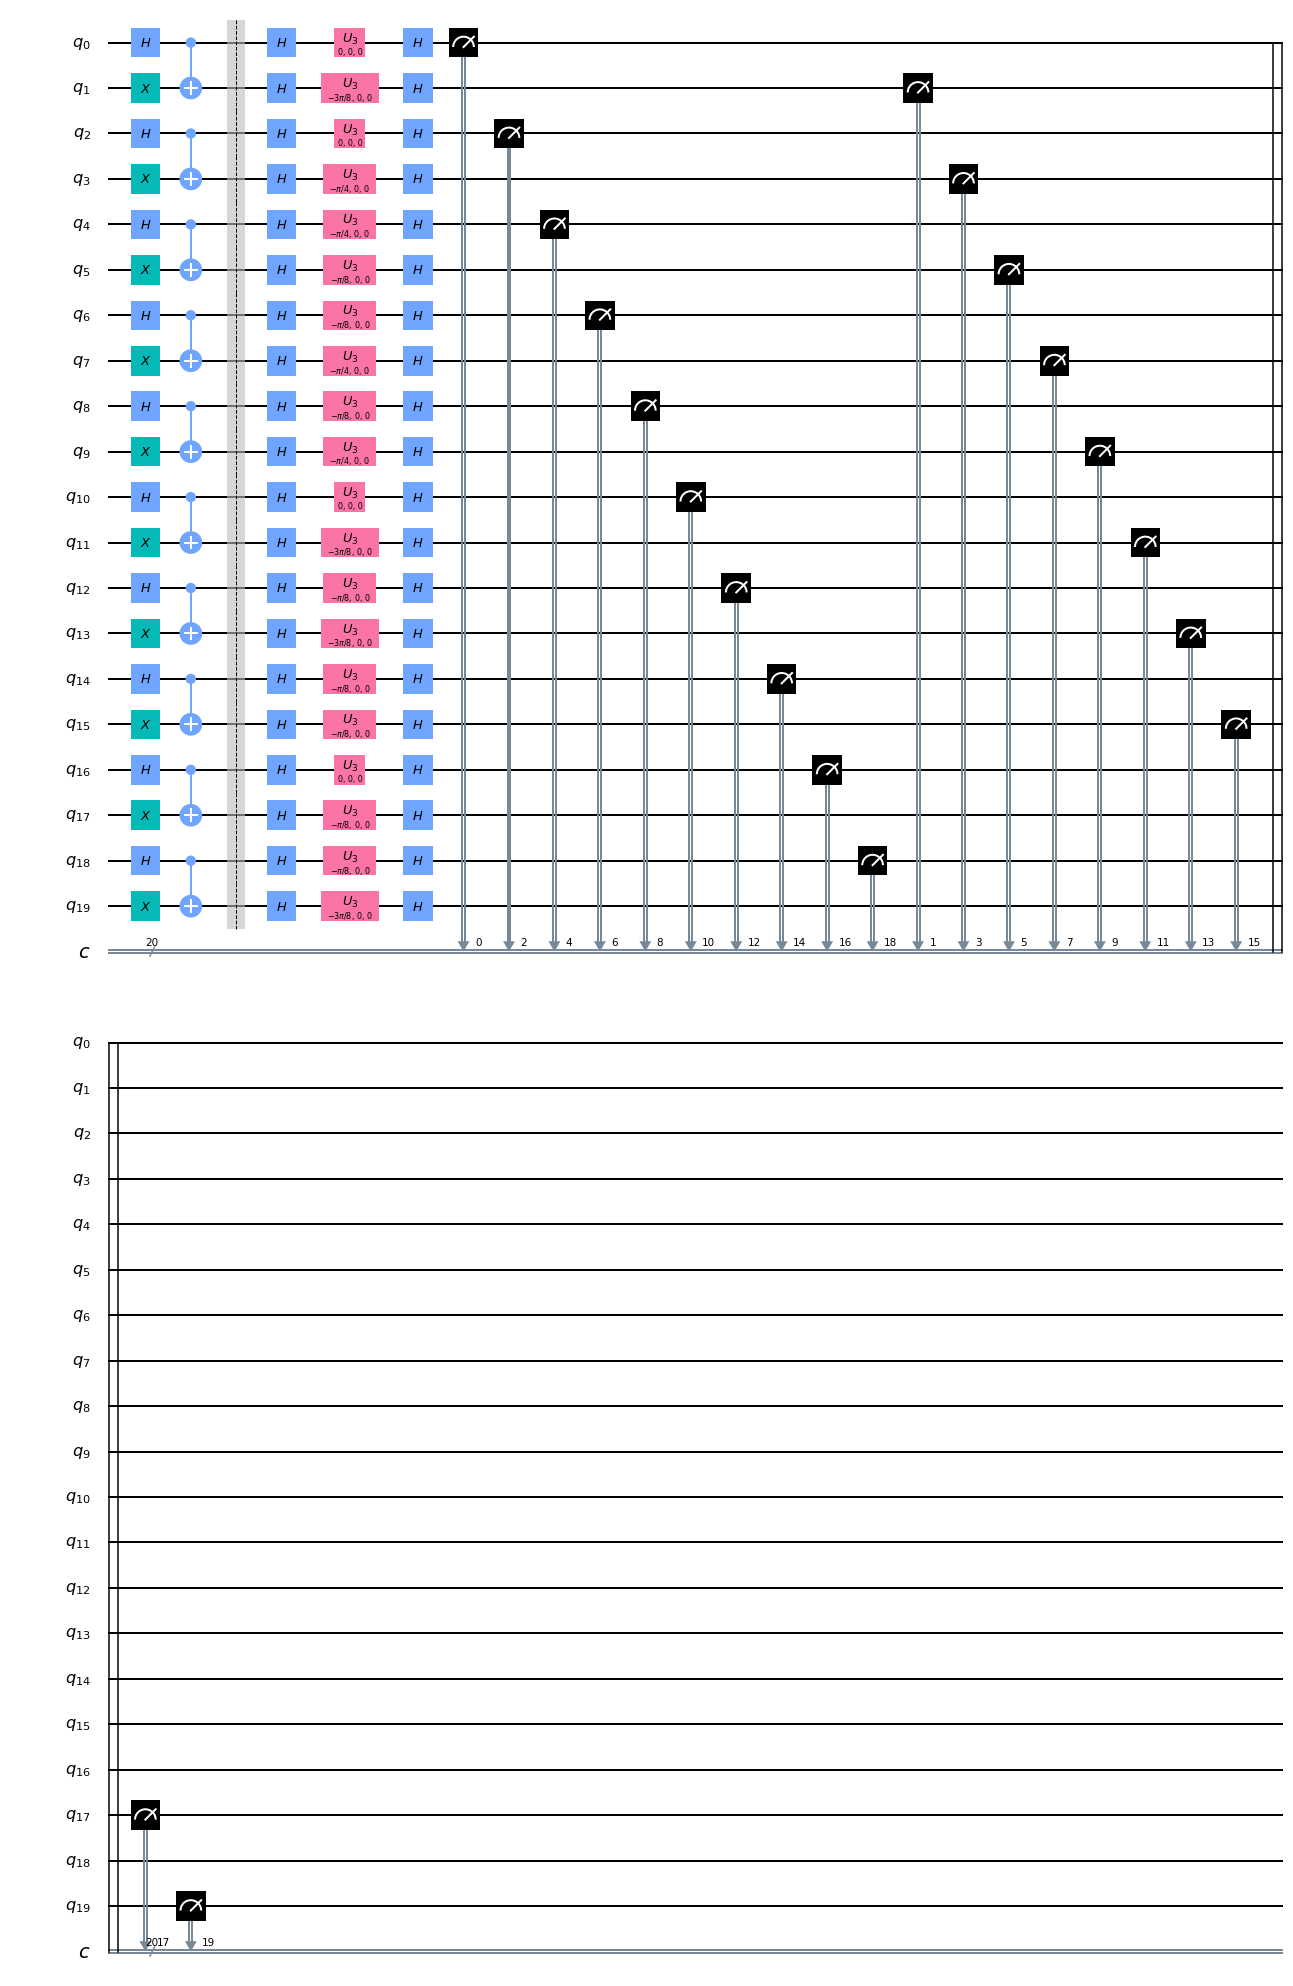

In [11]:
qc.draw(output='mpl')

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table